In [36]:
import numpy as np
import pandas as pd
# from sklearn.externals import joblib

In [37]:
# DATA FOR PRED
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
data.shape

(768, 9)

In [39]:
data.isnull().values.any()

False

In [40]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Correlation

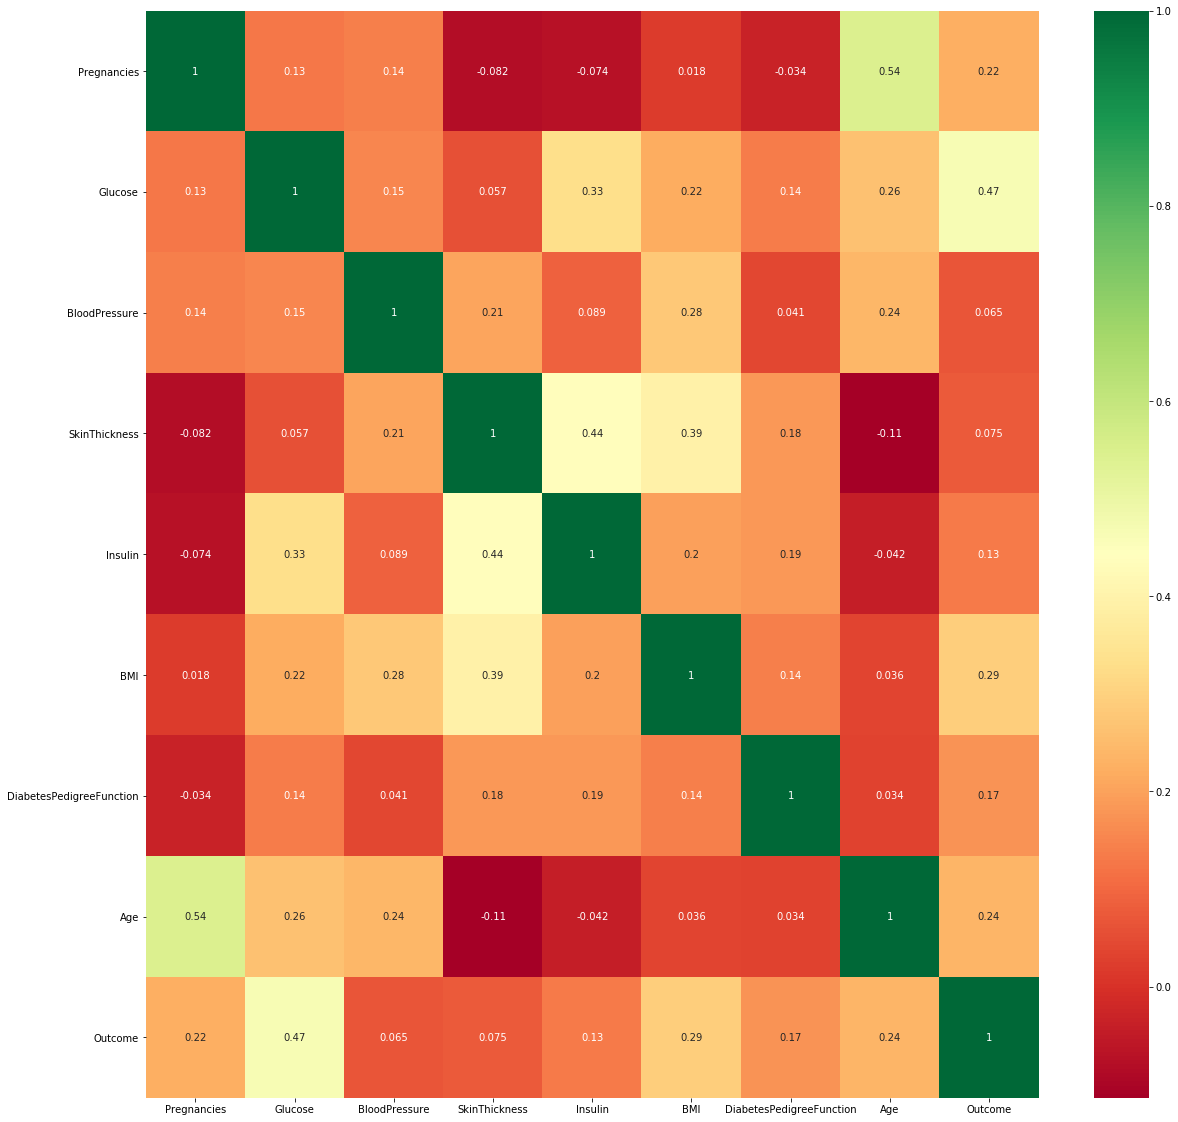

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [42]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [43]:
(diabetes_true_count , diabetes_false_count)

(268, 500)

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [45]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
data.shape

(768, 9)

In [46]:
X = data[feature_columns].values
y = data[predicted_class].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [51]:
print("This is full Data Shape = " , data.shape)
print("This is X_train Shape = " , X_train.shape)
print("This is X_test Shape = " ,  X_test.shape)
print("This is y_train Shape = " ,  y_train.shape)
print("This is y_test Shape = " , y_test.shape)

This is full Data Shape =  (768, 9)
This is X_train Shape =  (614, 8)
This is X_test Shape =  (154, 8)
This is y_train Shape =  (614, 1)
This is y_test Shape =  (154, 1)


In [52]:
y_train

array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

## Apply RandomForestClassifier Algorithm

In [48]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [30]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.773


##  Save the model to Local ENV.

In [33]:
import pickle
# open a file, where you ant to store the data
file = open('Diabetes_Prediction.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_model, file)

In [35]:
model = open('Diabetes_Prediction.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(X_test)

metrics.accuracy_score(y_test, predict_train_data)

0.7662337662337663